In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from numpy.random import randn
import copy

# 51

In [2]:
def soft_th(lam, x):
    return np.sign(x) * np.maximum(abs(x)-lam, 0)

Text(-1.5, 1, 'λ=5')

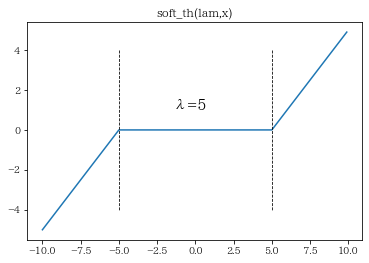

In [3]:
x_seq=np.arange(-10,10,0.1)
plt.plot(x_seq,soft_th(5,x_seq))
plt.plot([-5,-5],[4,-4],c="black",linestyle="dashed",linewidth=0.8)
plt.plot([5,5],[4,-4],c="black",linestyle="dashed",linewidth=0.8)
plt.title("soft_th(lam,x)")
plt.text( -1.5,1, 'λ=5',fontsize=15)

# 53

In [4]:
def lasso(x,y,lam=0): #lamはlambdaの略
    X=copy.copy(x)
    n,p=X.shape
    X_bar=np.zeros(p)
    s=np.zeros(p)
    for j in range(p):
        X_bar[j]=np.mean(X[:,j])
    for j in range(p):
        s[j]=np.std(X[:,j])
        X[:,j]=(X[:,j]-X_bar[j])/s[j]
    y_bar=np.mean(y)
    y=y-y_bar
    eps=1
    beta=np.zeros(p)
    beta_old=np.zeros(p)
    while eps>0.001:
        for j in range(p):
            index=list(set(range(p))-{j})
            r =   y - X[:,index]@beta[index]  # 空欄(1)
            beta[j]=  soft_th(lam, r.T@X[:,j]/n)  # 空欄(2)
        eps=np.max(np.abs(beta-beta_old))
        beta_old=copy.copy(beta)
    for j in range(p):
        beta[j]=beta[j]/s[j]
    beta_0=  y_bar - X_bar.T@beta  # 空欄(3)
    return {'beta':beta, 'beta_0':beta_0}

In [5]:
df=np.loadtxt("./distribution/crime.txt",delimiter="\t")
X=df[:,[i for i in range(2,7,1)]]
p=X.shape[1]
y=df[:,0]

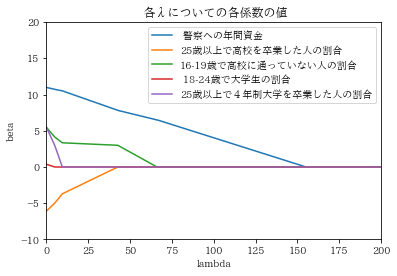

In [6]:
lambda_seq=np.arange(0,200,0.5)
plt.xlim(0,200)
plt.ylim(-10,20)
plt.xlabel("lambda")
plt.ylabel("beta")
labels=[" 警察への年間資金","25歳以上で高校を卒業した人の割合","16-19歳で高校に通っていない人の割合", " 18-24歳で大学生の割合","25歳以上で４年制大学を卒業した人の割合"]
for j in range(p):
    coef_seq=[]
    for l in lambda_seq:
        coef_seq.append(lasso(X,y,l)['beta'][j])  # 空欄(4)
    plt.plot(lambda_seq,coef_seq,label="{}".format(labels[j]))
plt.legend(loc="upper right")
plt.title(" 各λについての各係数の値")
plt.show()

# 54

In [7]:
def ridge(x,y,lam=0): #lamはlambdaの略
    X=copy.copy(x)
    n,p=X.shape
    X_bar=np.zeros(p)
    s=np.zeros(p)
    for j in range(p):
        X_bar[j]=np.mean(X[:,j])
    for j in range(p):
        s[j]=np.std(X[:,j])
        X[:,j]=(X[:,j]-X_bar[j])/s[j]
    y_bar=np.mean(y)
    y=y-y_bar
    beta=np.linalg.inv(X.T@X+n*lam*np.eye(p))@X.T@y
    for j in range(p):
        beta[j] = beta[j]/s[j]
    beta_0=  y_bar - X_bar.T@beta
    return {'beta':beta, 'beta_0':beta_0}

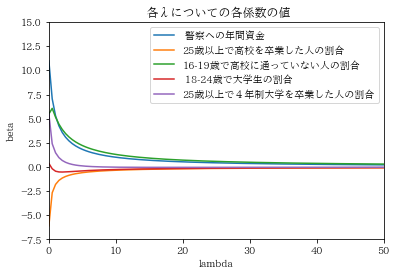

In [8]:
lambda_seq=np.arange(0,200,0.5)
plt.xlim(0,50)
plt.ylim(-7.5,15)
plt.xlabel("lambda")
plt.ylabel("beta")
labels=[" 警察への年間資金","25歳以上で高校を卒業した人の割合","16-19歳で高校に通っていない人の割合", " 18-24歳で大学生の割合","25歳以上で４年制大学を卒業した人の割合"]
for j in range(p):
    coef_seq=[]
    for l in lambda_seq:
        coef_seq.append(ridge(X,y,l)['beta'][j])
    plt.plot(lambda_seq,coef_seq,label="{}".format(labels[j]))
plt.legend(loc="upper right")
plt.title(" 各λについての各係数の値")
plt.show()

# 55

In [12]:
from sklearn.linear_model import Lasso, LassoCV

In [10]:
lasso = Lasso(alpha=20)
lasso.fit(X,y)
lasso.coef_

array([11.09067594, -5.2800757 ,  4.65494282,  0.55015932,  2.84324295])

In [14]:
# alphasに指定した値をグリッドサーチする
lcv = LassoCV(alphas=np.arange(0.1,30,0.1), cv=10)
lcv.fit(X,y)
print(lcv.alpha_)
print(lcv.coef_)

29.900000000000002
[11.14516156 -4.87861992  4.24780979  0.63662582  1.52576885]


coef_が非零の値を持てばその変数が選択されたことを示すので、0,2,3,4番目の変数が選択された